# Explore the CENSUS2000 dataset

1)Are there some missing variables? What are some methods for dealing with the missing values? Apply one of them.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

census2000 = pd.read_csv('/Users/rjernestcohen/Desktop/MSc Business Analytics/MSCA 681 - Foundations of Data Mining/Assignments/Assignment 3/census2000.csv')
census2000.head()

,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
0,601,-66.749472,18.180103,70.0,19143,9888,3.24
1,602,-67.180247,18.363285,83.0,42042,11384,3.10
2,603,-67.134224,18.448619,86.0,55592,10748,2.84
3,604,-67.136995,18.498987,83.0,3844,31199,3.00
4,606,-66.958807,18.182151,65.0,6449,9243,3.20


In [2]:
print(census2000.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33178 entries, 0 to 33177
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        33178 non-null  object 
 1   LocX      33178 non-null  float64
 2   LocY      33178 non-null  float64
 3   RegDens   32165 non-null  float64
 4   RegPop    33178 non-null  int64  
 5   MedHHInc  33178 non-null  int64  
 6   MeanHHSz  33178 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.8+ MB
None


Methods for dealing with the missing values

1)Delete records:Remove rows with missing data

2)Imputation (Mean/Median):Replace missing value with mean/median of the variable


In [3]:
missing_vals = census2000.isnull().sum()
missing_vals[missing_vals > 0]

RegDens    1013
dtype: int64

yes, RegDens is missing 1013 values

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean.fit(census2000[['RegDens']])
census2000['RegDens'] = imp_mean.transform(census2000[['RegDens']])

In [5]:
print(census2000.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33178 entries, 0 to 33177
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        33178 non-null  object 
 1   LocX      33178 non-null  float64
 2   LocY      33178 non-null  float64
 3   RegDens   33178 non-null  float64
 4   RegPop    33178 non-null  int64  
 5   MedHHInc  33178 non-null  int64  
 6   MeanHHSz  33178 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.8+ MB
None


The missing values are gone in the above table

2. Create some scatter plots? How is the data geographically spread? (You should not limit your exploration to these).

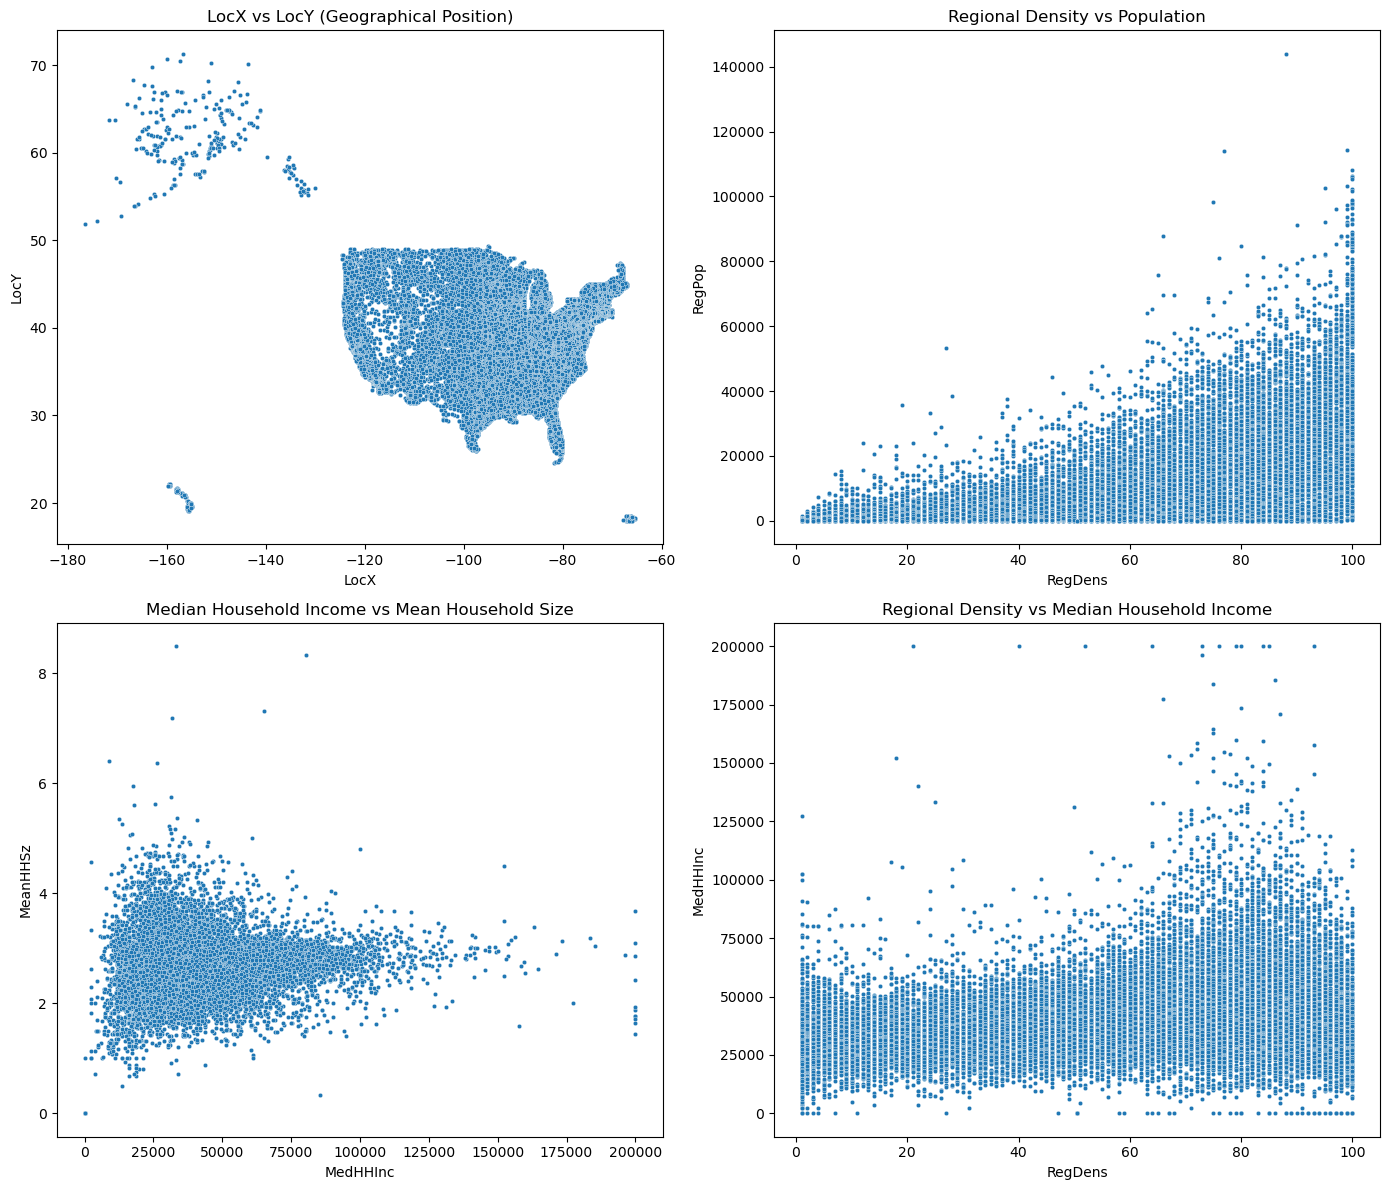

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# LocX vs LocY 
sns.scatterplot(data=census2000, x='LocX', y='LocY', ax=axes[0,0], s=10)
axes[0,0].set_title('LocX vs LocY (Geographical Position)')

# RegDens vs RegPop
sns.scatterplot(data=census2000, x='RegDens', y='RegPop', ax=axes[0,1], s=10)
axes[0,1].set_title('Regional Density vs Population')

# MedHHInc vs MeanHHSz
sns.scatterplot(data=census2000, x='MedHHInc', y='MeanHHSz', ax=axes[1,0], s=10)
axes[1,0].set_title('Median Household Income vs Mean Household Size')

#RegDens vs MedHHInc
sns.scatterplot(data=census2000, x='RegDens', y='MedHHInc', ax=axes[1,1], s=10)
axes[1,1].set_title('Regional Density vs Median Household Income')

plt.tight_layout()
plt.show()

How is the data geographically spread?

LocX ≈ –125 to –70 

LocY ≈ 25 to 50 

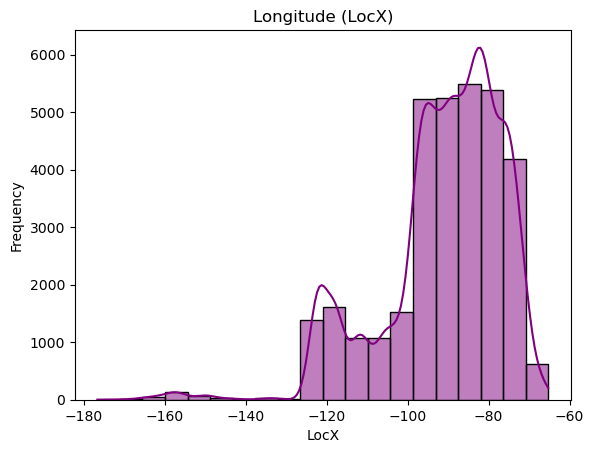

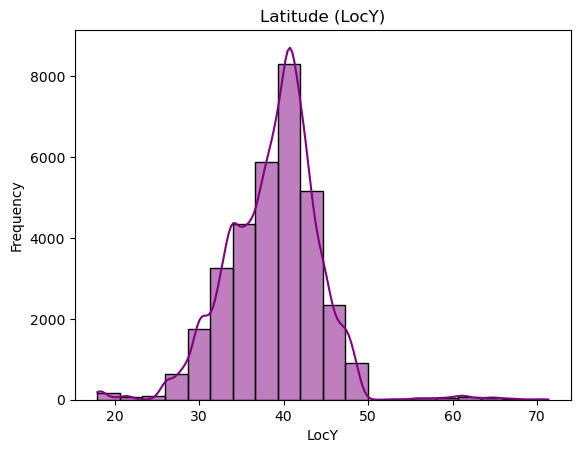

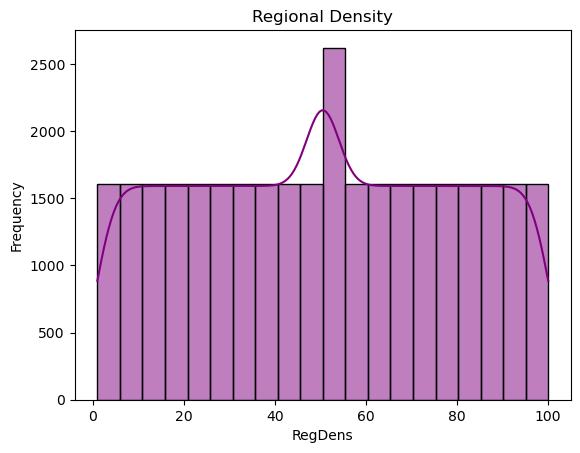

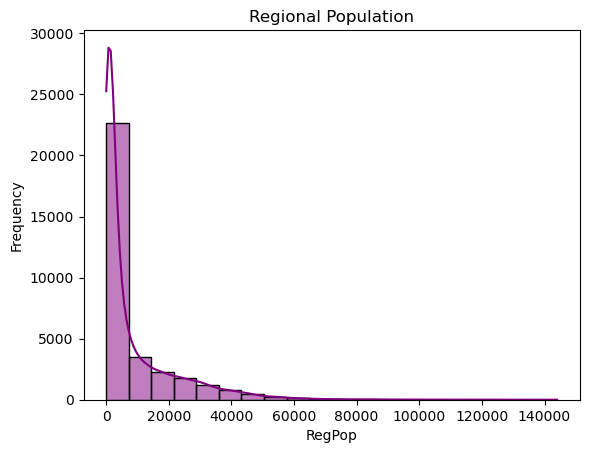

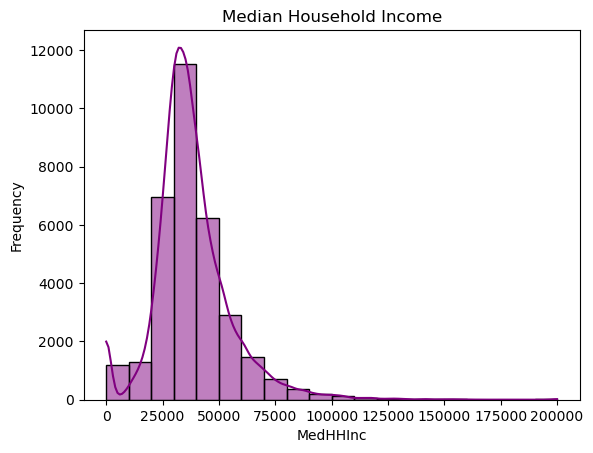

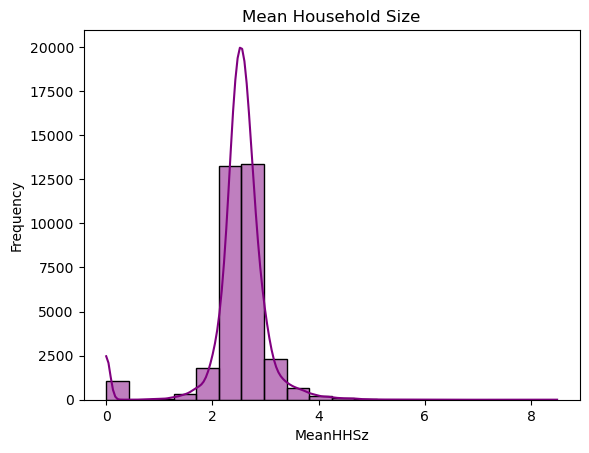

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["LocX", "LocY", "RegDens", "RegPop", "MedHHInc", "MeanHHSz"]


custom_titles = {
    "LocX": "Longitude (LocX)",
    "LocY": "Latitude (LocY)",
    "RegDens": "Regional Density",
    "RegPop": "Regional Population",
    "MedHHInc": "Median Household Income",
    "MeanHHSz": "Mean Household Size"
}

for col in num_cols:
    sns.histplot(census2000[col], kde=True, color="purple", bins=20)
    plt.title(custom_titles.get(col, col))
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

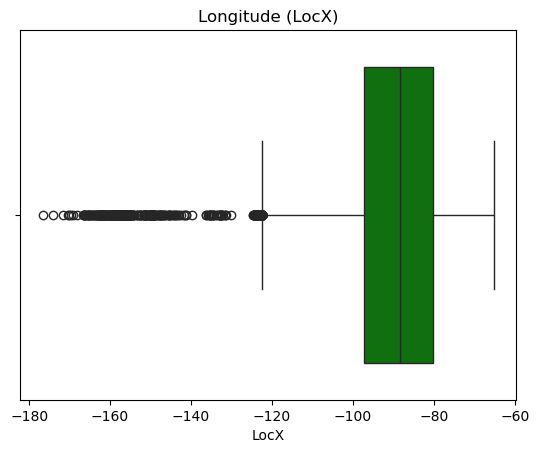

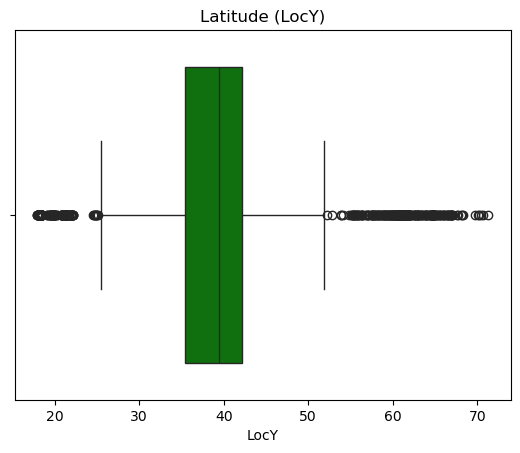

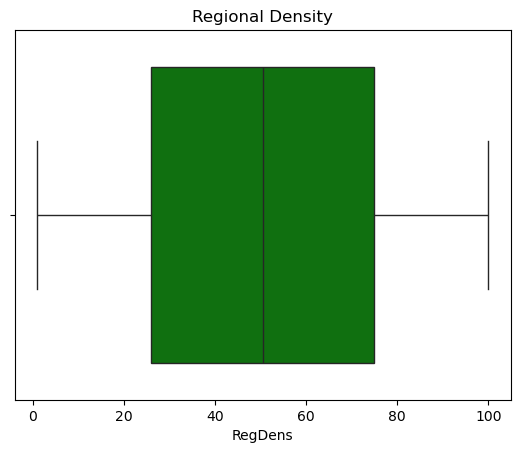

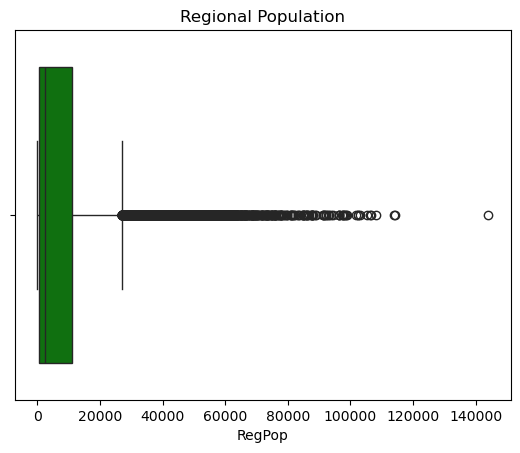

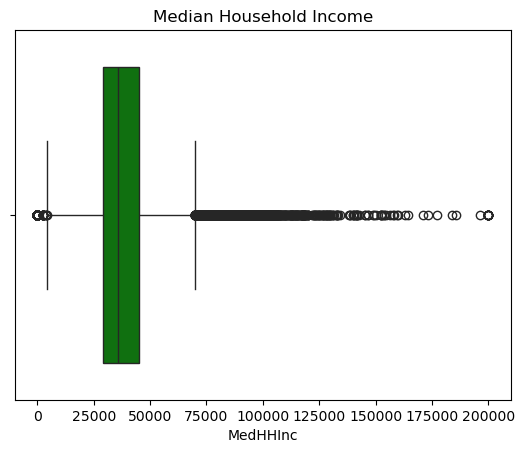

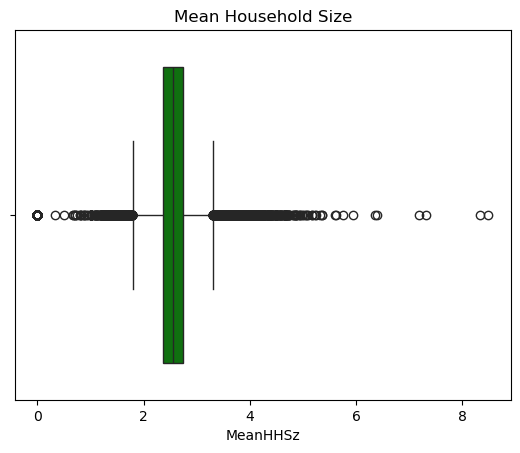

In [8]:
num_cols = ["LocX", "LocY", "RegDens", "RegPop", "MedHHInc", "MeanHHSz"]
custom_titles = {
    "LocX": "Longitude (LocX)",
    "LocY": "Latitude (LocY)",
    "RegDens": "Regional Density",
    "RegPop": "Regional Population",
    "MedHHInc": "Median Household Income",
    "MeanHHSz": "Mean Household Size"
}
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    sns.boxplot(x = census2000[col], color = "green")
    plt.title(custom_titles.get(col, col))
    plt.xlabel(col)
    plt.show()

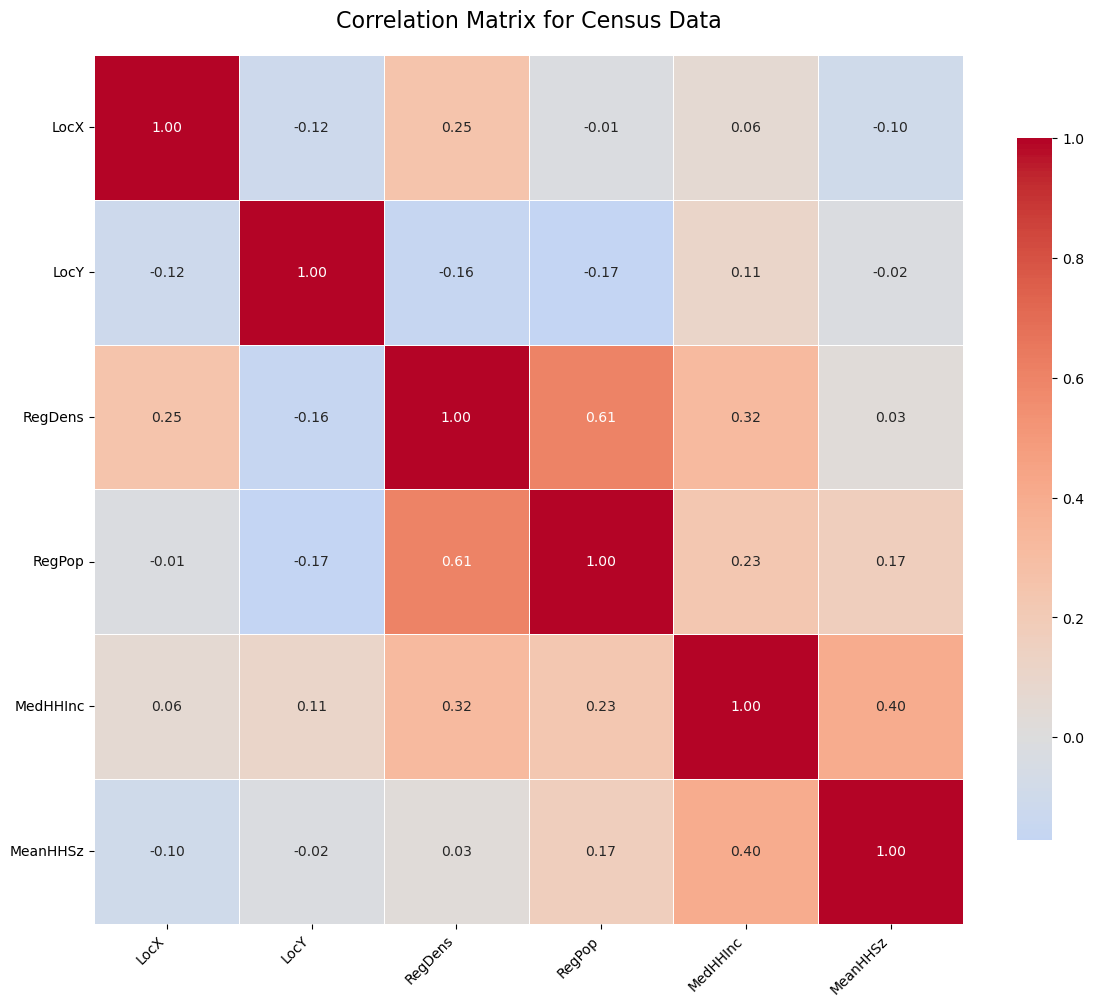

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
census_numeric = census2000.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = census_numeric.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix,
            annot=True,              
            cmap='coolwarm',         
            fmt='.2f',               
            square=True,              
            cbar_kws={"shrink": .8},  
            linewidths=0.5,           
            center=0)                 

plt.title('Correlation Matrix for Census Data', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


3. Does any of the variables need transformation? Describe your answer and perform the variable(s) transformation.

Yes, RegPop_log and MedHHInc_log need transformation:

Regional Population (RegPop): Has a very big right tail and many outliers (The main box is very compressed )

Median Household Income (MedHHInc): Is Right-skewed with many outliers on the right side (higher income household)

In [12]:
import numpy as np

census2000["RegPop_log"] = np.log1p(census2000["RegPop"])
census2000["MedHHInc_log"] = np.log1p(census2000["MedHHInc"])

Visualize Transformed data

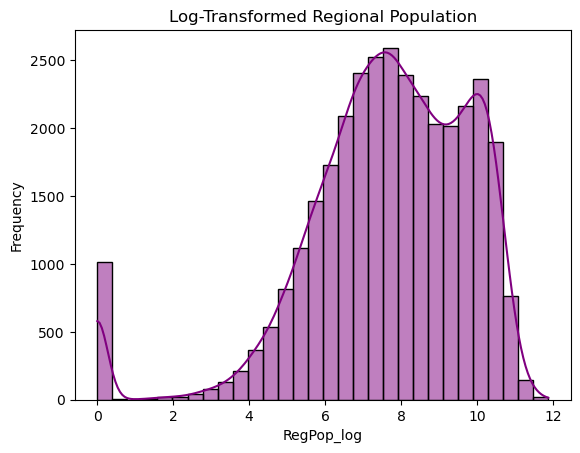

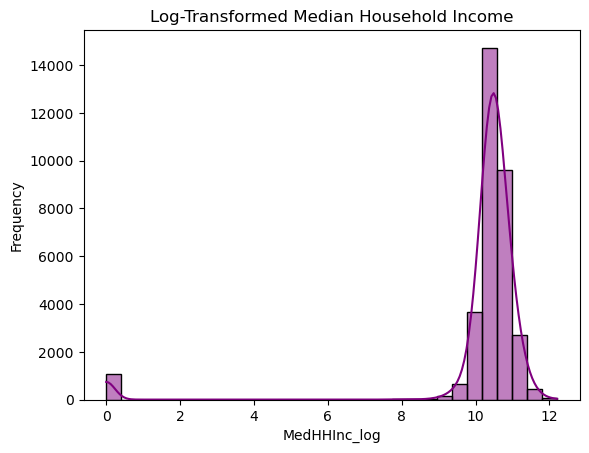

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

transformed_cols = ["RegPop_log", "MedHHInc_log"]

custom_titles_trans = {
    "RegPop_log": "Log-Transformed Regional Population",
    "MedHHInc_log": "Log-Transformed Median Household Income"
}
for col in transformed_cols:
    sns.histplot(census2000[col], kde=True, color="Purple", bins=30)
    plt.title(custom_titles_trans.get(col, col))
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


# Cluster analysis

#### 1. Select only household income, size and population density for the clustering analysis.

In [18]:
# Select the three variables for clustering
features = census2000[['MedHHInc_log', 'MeanHHSz', 'RegDens']]
features.head()

# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, 
                               columns=['MedHHInc_log', 'MeanHHSz', 'RegDens'])

#### 2. Use K-means on the standardized features to determine the optimal number of clusters. Plot the graphs and justify your choice of k. Consider k values from 2 to 15. Use random_state=42. 

##### Elbow Method

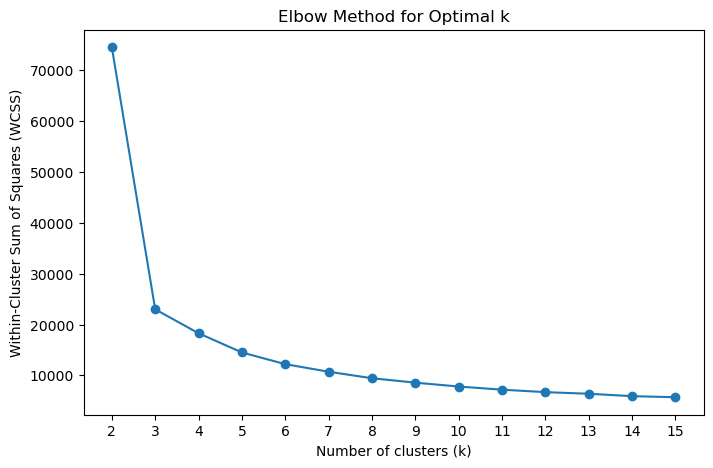

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(2, 16)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(K_range)
plt.show()

As an interesting experiment, we opted to test the Elbow Method plots with both the transformed and the untransformed income variable to see if there was any difference. The untransformed income variable dominated the clustering solution due to its large scale and strong right skew, which produced a smoother elbow curve with no clear inflection point. After applying a log transformation, the variance in income became more comparable to the other features (per the plot above). This revealed more distinct structure in the data, resulting in a sharper elbow between k = 2 and k = 3.

##### Silhouette Score

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

K_range = range(2, 16)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

k = 2, Silhouette Score = 0.390
k = 3, Silhouette Score = 0.479
k = 4, Silhouette Score = 0.369
k = 5, Silhouette Score = 0.379
k = 6, Silhouette Score = 0.379
k = 7, Silhouette Score = 0.337
k = 8, Silhouette Score = 0.337
k = 9, Silhouette Score = 0.316
k = 10, Silhouette Score = 0.321
k = 11, Silhouette Score = 0.315
k = 12, Silhouette Score = 0.311
k = 13, Silhouette Score = 0.305
k = 14, Silhouette Score = 0.310
k = 15, Silhouette Score = 0.298


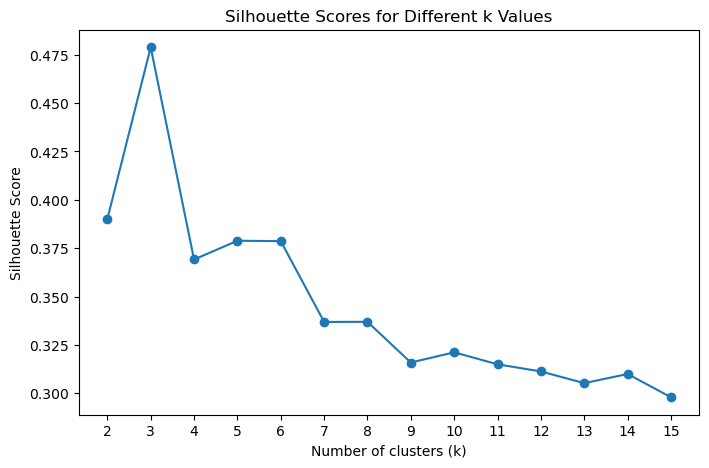

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k Values")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.show()

We selected **k = 3** as the optimal number of clusters.
The silhouette analysis showed that k = 3 achieved the highest score (0.479), meaning this k value resulted in the strongest cohesion within clusters and the clearest separation between them among the options. This was a substantial improvement over k = 2 and all the higher values, which exhibited noticeably lower silhouette scores.

The elbow method also supports this choice: the WCSS curve shows a sharp drop from k = 2 to k = 3, followed by a clear flattening. There are diminishing returns beyond three clusters.

Together, these two evaluation methods indicate that k = 3 best captures the natural structure of the data while balancing accuracy and interpretability.

#### 3. Using your chosen k, fit the K-means model on the standardized features and assign each observation to a cluster. 

#### 3.a: For each cluster, get the summary statistics for the input variables to help describe the cluster profile. 

In [31]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
# Fit on the standardized features and get cluster labels
census2000['Cluster'] = kmeans_final.fit_predict(features_scaled)
cluster_summary = census2000.groupby('Cluster')[['MedHHInc_log',
                                                 'MeanHHSz',
                                                 'RegDens']].agg(['mean', 'min', 'max'])

print(cluster_summary)

        MedHHInc_log                       MeanHHSz                RegDens  \
                mean       min        max      mean   min   max       mean   
Cluster                                                                      
0          10.388412  7.824046  12.206083  2.561347  0.33  8.49  25.386877   
1          10.635823  7.824046  12.206083  2.608437  0.75  8.33  75.315165   
2           0.000000  0.000000   0.000000  0.000924  0.00  1.00  52.104913   

                      
          min    max  
Cluster               
0         1.0   53.0  
1        48.0  100.0  
2         1.0  100.0  


#### 3.b: Create a three-dimensional scatter plot of the three input variables (indicate the clusters with different colors).

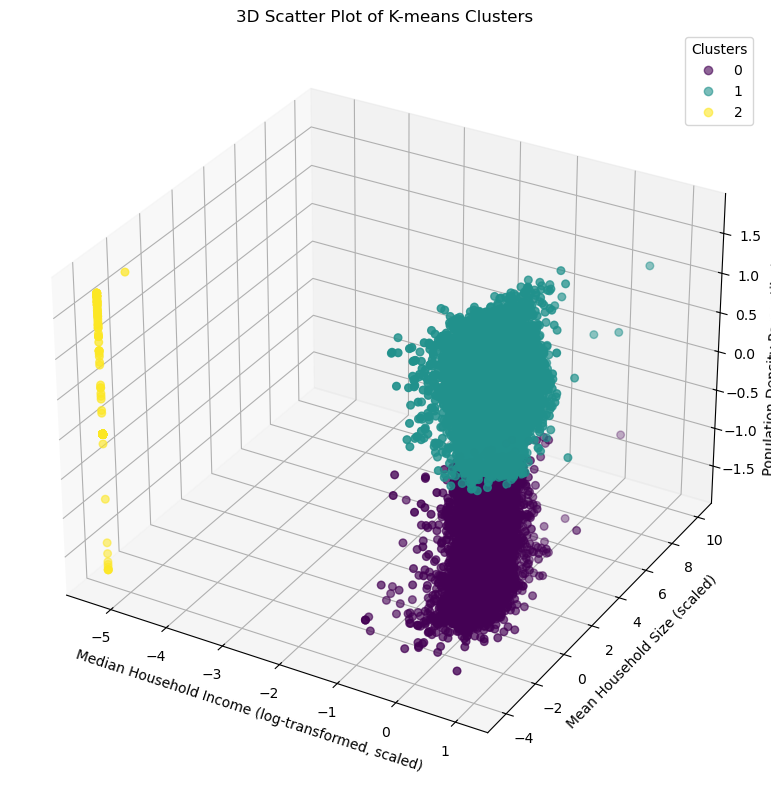

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    features_scaled['MedHHInc_log'],
    features_scaled['MeanHHSz'],
    features_scaled['RegDens'],
    c=census2000['Cluster'],
    cmap='viridis',
    s=30
)

# Axis labels
ax.set_xlabel('Median Household Income (log-transformed, scaled)')
ax.set_ylabel('Mean Household Size (scaled)')
ax.set_zlabel('Population Density Percentile (scaled)')

# Legend for clusters
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, labels, title="Clusters")

plt.title("3D Scatter Plot of K-means Clusters")
plt.tight_layout()
plt.show()

#### 3.c: Create a scatter plot of LOCY and LOCX (indicating the clusters with different colors).

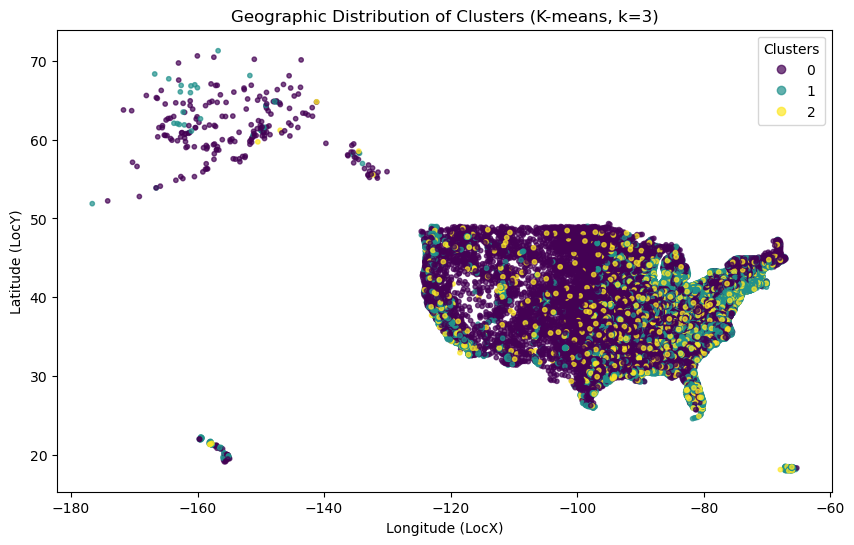

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    census2000['LocX'],
    census2000['LocY'],
    c=census2000['Cluster'],
    cmap='viridis',
    s=10,
    alpha=0.7
)

plt.xlabel("Longitude (LocX)")
plt.ylabel("Latitude (LocY)")
plt.title("Geographic Distribution of Clusters (K-means, k=3)")

handles, labels = scatter.legend_elements(prop="colors", alpha=0.7)
plt.legend(handles, labels, title="Clusters")

plt.show()